In [ ]:
!pip install qiskit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
from qiskit import *


In [ ]:
#defining a function which simulates a single qubit full adder
#for a full adder s= a xor b xor cin and cout=a.b xor (a xor b).cin
def full_Adder(cin,a,b,cout,circuit):
  circuit.ccx(a,b,cout)#cout=cout xor a.b, initially cout=0 so after this cout=a.b
  circuit.cx(a,b)#b=a xor b
  circuit.ccx(cin,b,cout)#cout=cout xor cin.b which implies cout= a.b xor cin.(a xor b) which is equivalent to the carry generated
  circuit.cx(cin,b)#b=b xor cin which implies b= a xor b xor cin which is eual to the sum
  circuit.barrier()




















In [ ]:
#Defining the quantum registers and circuit
a=QuantumRegister(4,'a')#It represents the register for first number
b=QuantumRegister(4,'b')#It represents the register for second number
c=QuantumRegister(5,'c')#It is the register to store the carry from each full adder

s=ClassicalRegister(5,'s')#It is used to measure the quantum qubits
circuit=QuantumCircuit(a,b,c,s)#Defining the circuit and it's elements
circuit.draw()

a_0: 
     
a_1: 
     
a_2: 
     
a_3: 
     
b_0: 
     
b_1: 
     
b_2: 
     
b_3: 
     
c_0: 
     
c_1: 
     
c_2: 
     
c_3: 
     
c_4: 
     
s: 5/

CASE 1-> a=|0010> b=|1011>

In [ ]:
#definig the numbers in the two quantum registers
circuit.x(a[1])#applying not gate to a[1]
circuit.x(b[0])#applying not gate to b[0]
circuit.x(b[1])#applying not gate to b[1]
circuit.x(b[3])#applying not gate to b[3]


In [ ]:
circuit.draw()

a_0: ─────
     ┌───┐
a_1: ┤ X ├
     └───┘
a_2: ─────
          
a_3: ─────
     ┌───┐
b_0: ┤ X ├
     ├───┤
b_1: ┤ X ├
     └───┘
b_2: ─────
     ┌───┐
b_3: ┤ X ├
     └───┘
c_0: ─────
          
c_1: ─────
          
c_2: ─────
          
c_3: ─────
          
c_4: ─────
          
s: 5/═════

In [ ]:
#implementing full adder for each single qubit of the quantum register
for i in range(4):
  full_Adder(c[i],a[i],b[i],c[i+1],circuit)
#Measuring the qubits
circuit.measure(b[0],s[0])
circuit.measure(b[1],s[1])
circuit.measure(b[2],s[2])
circuit.measure(b[3],s[3])
circuit.measure(c[4],s[4])
circuit.draw()




░                      ░                      ░ »
a_0: ───────■────■─────────────░──────────────────────░──────────────────────░─»
     ┌───┐  │    │             ░                      ░                      ░ »
a_1: ┤ X ├──┼────┼─────────────░───■────■─────────────░──────────────────────░─»
     └───┘  │    │             ░   │    │             ░                      ░ »
a_2: ───────┼────┼─────────────░───┼────┼─────────────░───■────■─────────────░─»
            │    │             ░   │    │             ░   │    │             ░ »
a_3: ───────┼────┼─────────────░───┼────┼─────────────░───┼────┼─────────────░─»
     ┌───┐  │  ┌─┴─┐     ┌───┐ ░   │    │             ░   │    │             ░ »
b_0: ┤ X ├──■──┤ X ├──■──┤ X ├─░───┼────┼─────────────░───┼────┼─────────────░─»
     ├───┤  │  └───┘  │  └─┬─┘ ░   │  ┌─┴─┐     ┌───┐ ░   │    │             ░ »
b_1: ┤ X ├──┼─────────┼────┼───░───■──┤ X ├──■──┤ X ├─░───┼────┼─────────────░─»
     └───┘  │         │    │   ░   │  └───┘  │  └─┬─┘ ░   │  ┌─┴─┐     ┌───┐ ░ »
b_2: ───────┼─────────┼────┼───░───┼─────────┼────┼───░───■──┤ X ├──■──┤ X ├─░─»
     ┌───┐  │         │    │   ░   │         │    │   ░   │  └───┘  │  └─┬─┘ ░ »
b_3: ┤ X ├──┼─────────┼────┼───░───┼─────────┼────┼───░───┼─────────┼────┼───░─»
     └───┘  │         │    │   ░   │         │    │   ░   │         │    │   ░ »
c_0: ───────┼─────────■────■───░───┼─────────┼────┼───░───┼─────────┼────┼───░─»
          ┌─┴─┐     ┌─┴─┐      ░   │         │    │   ░   │         │    │   ░ »
c_1: ─────┤ X ├─────┤ X ├──────░───┼─────────■────■───░───┼─────────┼────┼───░─»
          └───┘     └───┘      ░ ┌─┴─┐     ┌─┴─┐      ░   │         │    │   ░ »
c_2: ──────────────────────────░─┤ X ├─────┤ X ├──────░───┼─────────■────■───░─»
                               ░ └───┘     └───┘      ░ ┌─┴─┐     ┌─┴─┐      ░ »
c_3: ──────────────────────────░──────────────────────░─┤ X ├─────┤ X ├──────░─»
                               ░                      ░ └───┘     └───┘      ░ »
c_4: ──────────────────────────░──────────────────────░──────────────────────░─»
                               ░                      ░                      ░ »
s: 5/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                          ░                
«a_0: ─────────────────────░────────────────
«                          ░                
«a_1: ─────────────────────░────────────────
«                          ░                
«a_2: ─────────────────────░────────────────
«                          ░                
«a_3: ──■────■─────────────░────────────────
«       │    │             ░ ┌─┐            
«b_0: ──┼────┼─────────────░─┤M├────────────
«       │    │             ░ └╥┘┌─┐         
«b_1: ──┼────┼─────────────░──╫─┤M├─────────
«       │    │             ░  ║ └╥┘┌─┐      
«b_2: ──┼────┼─────────────░──╫──╫─┤M├──────
«       │  ┌─┴─┐     ┌───┐ ░  ║  ║ └╥┘┌─┐   
«b_3: ──■──┤ X ├──■──┤ X ├─░──╫──╫──╫─┤M├───
«       │  └───┘  │  └─┬─┘ ░  ║  ║  ║ └╥┘   
«c_0: ──┼─────────┼────┼───░──╫──╫──╫──╫────
«       │         │    │   ░  ║  ║  ║  ║    
«c_1: ──┼─────────┼────┼───░──╫──╫──╫──╫────
«       │         │    │   ░  ║  ║  ║  ║    
«c_2: ──┼─────────┼────┼───░──╫──╫──╫──╫────
«       │         │    │   ░  ║  ║  ║  ║    
«c_3: ──┼─────────■────■───░──╫──╫──╫──╫────
«     ┌─┴─┐     ┌─┴─┐      ░  ║  ║  ║  ║ ┌─┐
«c_4: ┤ X ├─────┤ X ├──────░──╫──╫──╫──╫─┤M├
«     └───┘     └───┘      ░  ║  ║  ║  ║ └╥┘
«s: 5/════════════════════════╩══╩══╩══╩══╩═
«                             0  1  2  3  4

{'01101': 10000}


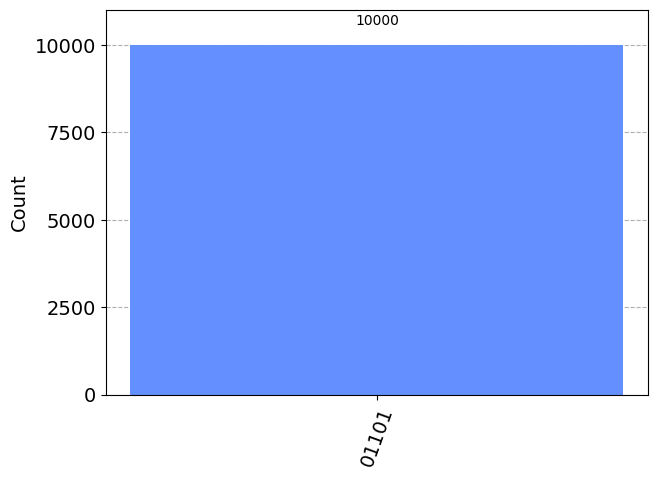

In [ ]:
#simulating the quantum circuit using quantum simulator
simulator=Aer.get_backend('qasm_simulator')
count=execute(circuit,backend=simulator,shots=10000).result().get_counts()
print(count)
from qiskit.visualization import plot_histogram
plot_histogram(count)

In [ ]:
print("Circuit depth=")
circuit.depth()

Circuit depth=


18

In [ ]:
circuit.clear()
circuit.draw()

a_0: 
     
a_1: 
     
a_2: 
     
a_3: 
     
b_0: 
     
b_1: 
     
b_2: 
     
b_3: 
     
c_0: 
     
c_1: 
     
c_2: 
     
c_3: 
     
c_4: 
     
s: 5/

CASE 2-> a=|0001> b=|0011>

In [ ]:
#definig the numbers in the two quantum registers
circuit.x(a[0])#applying not gate to a[0]
circuit.x(b[0])#applying not gate to b[0]
circuit.x(b[1])#applying not gate to b[1]
circuit.draw()

┌───┐
a_0: ┤ X ├
     └───┘
a_1: ─────
          
a_2: ─────
          
a_3: ─────
     ┌───┐
b_0: ┤ X ├
     ├───┤
b_1: ┤ X ├
     └───┘
b_2: ─────
          
b_3: ─────
          
c_0: ─────
          
c_1: ─────
          
c_2: ─────
          
c_3: ─────
          
c_4: ─────
          
s: 5/═════

In [ ]:
#implementing full adder for each single qubit of the quantum register
for i in range(4):
  full_Adder(c[i],a[i],b[i],c[i+1],circuit)
circuit.measure(b[0],s[0])
circuit.measure(b[1],s[1])
circuit.measure(b[2],s[2])
circuit.measure(b[3],s[3])
circuit.measure(c[4],s[4])


{'00100': 10000}


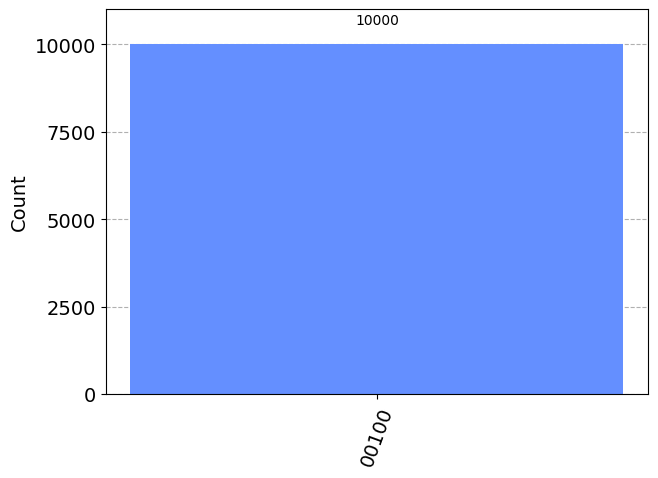

In [ ]:
simulator=Aer.get_backend('qasm_simulator')
count=execute(circuit,backend=simulator,shots=10000).result().get_counts()
print(count)
plot_histogram(count)

In [ ]:
print("Circuit depth=")
circuit.depth()

Circuit depth=


18

In [ ]:
circuit.clear()
circuit.draw()

a_0: 
     
a_1: 
     
a_2: 
     
a_3: 
     
b_0: 
     
b_1: 
     
b_2: 
     
b_3: 
     
c_0: 
     
c_1: 
     
c_2: 
     
c_3: 
     
c_4: 
     
s: 5/

CASE 3-> a=(|0010>+|0100>)/sqrt(2) b=(|1011>+|0001>)/sqrt(2)

In [ ]:
import numpy as np
from numpy import sqrt
desired_state_a = np.array([0, 0, 1, 0, 1, 0, 0, 0,0,0,0,0,0,0,0,0]) /sqrt(2)
circuit.initialize(desired_state_a, a)
desired_state_b = np.array([0, 1, 0, 0, 0, 0, 0, 0,0,0,0,1,0,0,0,0]) /sqrt(2)
circuit.initialize(desired_state_b, b)
circuit.draw()


┌──────────────────────────────────────────────────────────┐
a_0: ┤0                                                         ├
     │                                                          │
a_1: ┤1                                                         ├
     │  Initialize(0,0,0.70711,0,0.70711,0,0,0,0,0,0,0,0,0,0,0) │
a_2: ┤2                                                         ├
     │                                                          │
a_3: ┤3                                                         ├
     ├──────────────────────────────────────────────────────────┤
b_0: ┤0                                                         ├
     │                                                          │
b_1: ┤1                                                         ├
     │  Initialize(0,0.70711,0,0,0,0,0,0,0,0,0,0.70711,0,0,0,0) │
b_2: ┤2                                                         ├
     │                                                          │
b_3: ┤3                                                         ├
     └──────────────────────────────────────────────────────────┘
c_0: ────────────────────────────────────────────────────────────
                                                                 
c_1: ────────────────────────────────────────────────────────────
                                                                 
c_2: ────────────────────────────────────────────────────────────
                                                                 
c_3: ────────────────────────────────────────────────────────────
                                                                 
c_4: ────────────────────────────────────────────────────────────
                                                                 
s: 5/════════════════════════════════════════════════════════════

In [ ]:
#implementing full adder for each single qubit of the quantum register
for i in range(4):
  full_Adder(c[i],a[i],b[i],c[i+1],circuit)
circuit.measure(b[0],s[0])
circuit.measure(b[1],s[1])
circuit.measure(b[2],s[2])
circuit.measure(b[3],s[3])
circuit.measure(c[4],s[4])


{'01101': 2553, '00101': 2454, '01111': 2524, '00011': 2469}


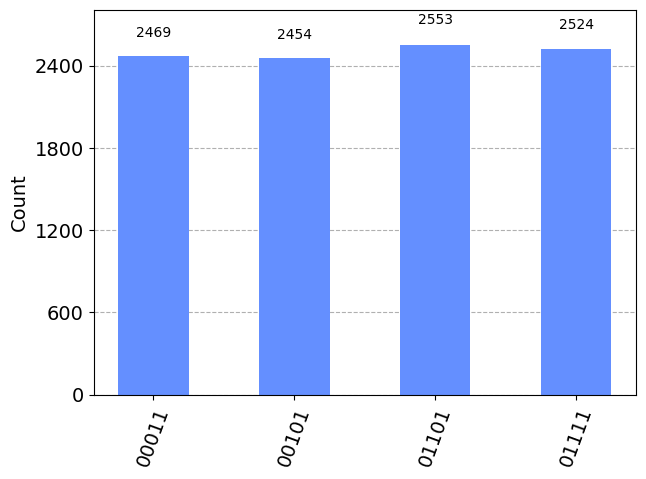

In [ ]:
simulator=Aer.get_backend('qasm_simulator')
count=execute(circuit,backend=simulator,shots=10000).result().get_counts()
print(count)
plot_histogram(count)

In [ ]:
print("Circuit depth=")
circuit.depth()

Circuit depth=


18

In [ ]:
circuit.clear()
circuit.draw()

a_0: 
     
a_1: 
     
a_2: 
     
a_3: 
     
b_0: 
     
b_1: 
     
b_2: 
     
b_3: 
     
c_0: 
     
c_1: 
     
c_2: 
     
c_3: 
     
c_4: 
     
s: 5/

Case 4-> a=(|0000>+|0111>)/sqrt(2) b=(|0111>+|1000>)/sqrt(2)

In [ ]:
desired_state_a = np.array([1, 0, 0, 0, 0, 0, 0, 1,0,0,0,0,0,0,0,0]) /sqrt(2)
circuit.initialize(desired_state_a, a)
desired_state_b = np.array([0, 0, 0, 0, 0, 0, 0, 1,1,0,0,0,0,0,0,0]) /sqrt(2)
circuit.initialize(desired_state_b, b)
circuit.draw()

┌──────────────────────────────────────────────────────────┐
a_0: ┤0                                                         ├
     │                                                          │
a_1: ┤1                                                         ├
     │  Initialize(0.70711,0,0,0,0,0,0,0.70711,0,0,0,0,0,0,0,0) │
a_2: ┤2                                                         ├
     │                                                          │
a_3: ┤3                                                         ├
     ├──────────────────────────────────────────────────────────┤
b_0: ┤0                                                         ├
     │                                                          │
b_1: ┤1                                                         ├
     │  Initialize(0,0,0,0,0,0,0,0.70711,0.70711,0,0,0,0,0,0,0) │
b_2: ┤2                                                         ├
     │                                                          │
b_3: ┤3                                                         ├
     └──────────────────────────────────────────────────────────┘
c_0: ────────────────────────────────────────────────────────────
                                                                 
c_1: ────────────────────────────────────────────────────────────
                                                                 
c_2: ────────────────────────────────────────────────────────────
                                                                 
c_3: ────────────────────────────────────────────────────────────
                                                                 
c_4: ────────────────────────────────────────────────────────────
                                                                 
s: 5/════════════════════════════════════════════════════════════

In [ ]:
#implementing full adder for each single qubit of the quantum register
for i in range(4):
  full_Adder(c[i],a[i],b[i],c[i+1],circuit)
circuit.measure(b[0],s[0])
circuit.measure(b[1],s[1])
circuit.measure(b[2],s[2])
circuit.measure(b[3],s[3])
circuit.measure(c[4],s[4])

{'01110': 2442, '01000': 2546, '00111': 2509, '01111': 2503}


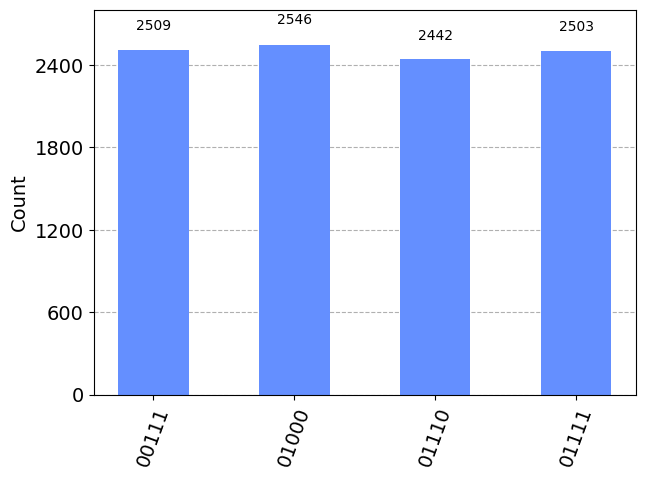

In [ ]:
simulator=Aer.get_backend('qasm_simulator')
count=execute(circuit,backend=simulator,shots=10000).result().get_counts()
print(count)
plot_histogram(count)

In [ ]:
print("Circuit depth=")
circuit.depth()

Circuit depth=


18

In [ ]:
circuit.clear()
circuit.draw()

a_0: 
     
a_1: 
     
a_2: 
     
a_3: 
     
b_0: 
     
b_1: 
     
b_2: 
     
b_3: 
     
c_0: 
     
c_1: 
     
c_2: 
     
c_3: 
     
c_4: 
     
s: 5/

ENTANGLEMENT


We will first look at variouys cases to discuss entangled qubits as inputs for a quantum adder, the complexity level will increase for each case
Case-1
a=|0010> b=|1011> and the rightmost qubit of both registers are entangled being in a bell state

In [ ]:
circuit.x(a[1])
circuit.x(b[0])
circuit.x(b[1])
circuit.x(b[3])

In [ ]:
#Entangling the qubits
circuit.h(a[0])
circuit.cx(a[0],b[0])

Here a[0]=0 and b[0}=1 entangling these two make them to be present in the state (|01>+|10>)/sqrt(2), i.e (b,a)=(0,1)or(1,0) with equal probability of 0.5 addition in both cases leads to the same result, hence we can get same result for all the shots

In [ ]:
#implementing full adder for each single qubit of the quantum register
for i in range(4):
  full_Adder(c[i],a[i],b[i],c[i+1],circuit)
circuit.measure(b[0],s[0])
circuit.measure(b[1],s[1])
circuit.measure(b[2],s[2])
circuit.measure(b[3],s[3])
circuit.measure(c[4],s[4])
circuit.draw()


┌───┐                          ░                      ░                »
a_0: ┤ H ├──■────■────■─────────────░──────────────────────░────────────────»
     ├───┤  │    │    │             ░                      ░                »
a_1: ┤ X ├──┼────┼────┼─────────────░───■────■─────────────░────────────────»
     └───┘  │    │    │             ░   │    │             ░                »
a_2: ───────┼────┼────┼─────────────░───┼────┼─────────────░───■────■───────»
            │    │    │             ░   │    │             ░   │    │       »
a_3: ───────┼────┼────┼─────────────░───┼────┼─────────────░───┼────┼───────»
     ┌───┐┌─┴─┐  │  ┌─┴─┐     ┌───┐ ░   │    │             ░   │    │       »
b_0: ┤ X ├┤ X ├──■──┤ X ├──■──┤ X ├─░───┼────┼─────────────░───┼────┼───────»
     ├───┤└───┘  │  └───┘  │  └─┬─┘ ░   │  ┌─┴─┐     ┌───┐ ░   │    │       »
b_1: ┤ X ├───────┼─────────┼────┼───░───■──┤ X ├──■──┤ X ├─░───┼────┼───────»
     └───┘       │         │    │   ░   │  └───┘  │  └─┬─┘ ░   │  ┌─┴─┐     »
b_2: ────────────┼─────────┼────┼───░───┼─────────┼────┼───░───■──┤ X ├──■──»
     ┌───┐       │         │    │   ░   │         │    │   ░   │  └───┘  │  »
b_3: ┤ X ├───────┼─────────┼────┼───░───┼─────────┼────┼───░───┼─────────┼──»
     └───┘       │         │    │   ░   │         │    │   ░   │         │  »
c_0: ────────────┼─────────■────■───░───┼─────────┼────┼───░───┼─────────┼──»
               ┌─┴─┐     ┌─┴─┐      ░   │         │    │   ░   │         │  »
c_1: ──────────┤ X ├─────┤ X ├──────░───┼─────────■────■───░───┼─────────┼──»
               └───┘     └───┘      ░ ┌─┴─┐     ┌─┴─┐      ░   │         │  »
c_2: ───────────────────────────────░─┤ X ├─────┤ X ├──────░───┼─────────■──»
                                    ░ └───┘     └───┘      ░ ┌─┴─┐     ┌─┴─┐»
c_3: ───────────────────────────────░──────────────────────░─┤ X ├─────┤ X ├»
                                    ░                      ░ └───┘     └───┘»
c_4: ───────────────────────────────░──────────────────────░────────────────»
                                    ░                      ░                »
s: 5/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«           ░                      ░                
«a_0: ──────░──────────────────────░────────────────
«           ░                      ░                
«a_1: ──────░──────────────────────░────────────────
«           ░                      ░                
«a_2: ──────░──────────────────────░────────────────
«           ░                      ░                
«a_3: ──────░───■────■─────────────░────────────────
«           ░   │    │             ░ ┌─┐            
«b_0: ──────░───┼────┼─────────────░─┤M├────────────
«           ░   │    │             ░ └╥┘┌─┐         
«b_1: ──────░───┼────┼─────────────░──╫─┤M├─────────
«     ┌───┐ ░   │    │             ░  ║ └╥┘┌─┐      
«b_2: ┤ X ├─░───┼────┼─────────────░──╫──╫─┤M├──────
«     └─┬─┘ ░   │  ┌─┴─┐     ┌───┐ ░  ║  ║ └╥┘┌─┐   
«b_3: ──┼───░───■──┤ X ├──■──┤ X ├─░──╫──╫──╫─┤M├───
«       │   ░   │  └───┘  │  └─┬─┘ ░  ║  ║  ║ └╥┘   
«c_0: ──┼───░───┼─────────┼────┼───░──╫──╫──╫──╫────
«       │   ░   │         │    │   ░  ║  ║  ║  ║    
«c_1: ──┼───░───┼─────────┼────┼───░──╫──╫──╫──╫────
«       │   ░   │         │    │   ░  ║  ║  ║  ║    
«c_2: ──■───░───┼─────────┼────┼───░──╫──╫──╫──╫────
«           ░   │         │    │   ░  ║  ║  ║  ║    
«c_3: ──────░───┼─────────■────■───░──╫──╫──╫──╫────
«           ░ ┌─┴─┐     ┌─┴─┐      ░  ║  ║  ║  ║ ┌─┐
«c_4: ──────░─┤ X ├─────┤ X ├──────░──╫──╫──╫──╫─┤M├
«           ░ └───┘     └───┘      ░  ║  ║  ║  ║ └╥┘
«s: 5/════════════════════════════════╩══╩══╩══╩══╩═
«                                     0  1  2  3  4

{'01101': 10000}


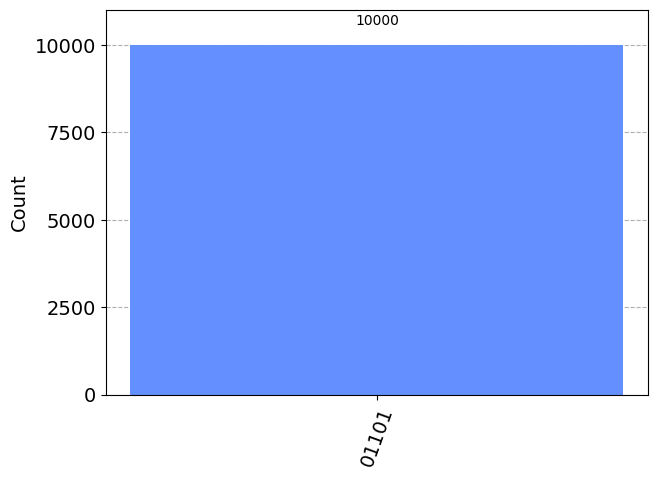

In [ ]:
from qiskit.visualization import plot_histogram
simulator=Aer.get_backend('qasm_simulator')
count=execute(circuit,backend=simulator,shots=10000).result().get_counts()
print(count)
plot_histogram(count)

In [ ]:
circuit.clear()
circuit.draw()

a_0: 
     
a_1: 
     
a_2: 
     
a_3: 
     
b_0: 
     
b_1: 
     
b_2: 
     
b_3: 
     
c_0: 
     
c_1: 
     
c_2: 
     
c_3: 
     
c_4: 
     
s: 5/

In [ ]:
circuit.x(a[1])
circuit.x(b[0])
circuit.x(b[1])
circuit.x(b[3])

Now for the same a and b let's entangle a[2] and b[2] where a[2]=0 and b[2]=0

In [ ]:
#Entangling the qubits
circuit.h(a[2])
circuit.cx(a[2],b[2])
circuit.draw()

a_0: ──────────
     ┌───┐     
a_1: ┤ X ├─────
     ├───┤     
a_2: ┤ H ├──■──
     └───┘  │  
a_3: ───────┼──
     ┌───┐  │  
b_0: ┤ X ├──┼──
     ├───┤  │  
b_1: ┤ X ├──┼──
     └───┘┌─┴─┐
b_2: ─────┤ X ├
     ┌───┐└───┘
b_3: ┤ X ├─────
     └───┘     
c_0: ──────────
               
c_1: ──────────
               
c_2: ──────────
               
c_3: ──────────
               
c_4: ──────────
               
s: 5/══════════

In [ ]:
#implementing full adder for each single qubit of the quantum register
for i in range(4):
  full_Adder(c[i],a[i],b[i],c[i+1],circuit)
circuit.measure(b[0],s[0])
circuit.measure(b[1],s[1])
circuit.measure(b[2],s[2])
circuit.measure(b[3],s[3])
circuit.measure(c[4],s[4])
circuit.draw()


░                      ░                »
a_0: ────────────■────■─────────────░──────────────────────░────────────────»
     ┌───┐       │    │             ░                      ░                »
a_1: ┤ X ├───────┼────┼─────────────░───■────■─────────────░────────────────»
     ├───┤       │    │             ░   │    │             ░                »
a_2: ┤ H ├──■────┼────┼─────────────░───┼────┼─────────────░───■────■───────»
     └───┘  │    │    │             ░   │    │             ░   │    │       »
a_3: ───────┼────┼────┼─────────────░───┼────┼─────────────░───┼────┼───────»
     ┌───┐  │    │  ┌─┴─┐     ┌───┐ ░   │    │             ░   │    │       »
b_0: ┤ X ├──┼────■──┤ X ├──■──┤ X ├─░───┼────┼─────────────░───┼────┼───────»
     ├───┤  │    │  └───┘  │  └─┬─┘ ░   │  ┌─┴─┐     ┌───┐ ░   │    │       »
b_1: ┤ X ├──┼────┼─────────┼────┼───░───■──┤ X ├──■──┤ X ├─░───┼────┼───────»
     └───┘┌─┴─┐  │         │    │   ░   │  └───┘  │  └─┬─┘ ░   │  ┌─┴─┐     »
b_2: ─────┤ X ├──┼─────────┼────┼───░───┼─────────┼────┼───░───■──┤ X ├──■──»
     ┌───┐└───┘  │         │    │   ░   │         │    │   ░   │  └───┘  │  »
b_3: ┤ X ├───────┼─────────┼────┼───░───┼─────────┼────┼───░───┼─────────┼──»
     └───┘       │         │    │   ░   │         │    │   ░   │         │  »
c_0: ────────────┼─────────■────■───░───┼─────────┼────┼───░───┼─────────┼──»
               ┌─┴─┐     ┌─┴─┐      ░   │         │    │   ░   │         │  »
c_1: ──────────┤ X ├─────┤ X ├──────░───┼─────────■────■───░───┼─────────┼──»
               └───┘     └───┘      ░ ┌─┴─┐     ┌─┴─┐      ░   │         │  »
c_2: ───────────────────────────────░─┤ X ├─────┤ X ├──────░───┼─────────■──»
                                    ░ └───┘     └───┘      ░ ┌─┴─┐     ┌─┴─┐»
c_3: ───────────────────────────────░──────────────────────░─┤ X ├─────┤ X ├»
                                    ░                      ░ └───┘     └───┘»
c_4: ───────────────────────────────░──────────────────────░────────────────»
                                    ░                      ░                »
s: 5/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«           ░                      ░                
«a_0: ──────░──────────────────────░────────────────
«           ░                      ░                
«a_1: ──────░──────────────────────░────────────────
«           ░                      ░                
«a_2: ──────░──────────────────────░────────────────
«           ░                      ░                
«a_3: ──────░───■────■─────────────░────────────────
«           ░   │    │             ░ ┌─┐            
«b_0: ──────░───┼────┼─────────────░─┤M├────────────
«           ░   │    │             ░ └╥┘┌─┐         
«b_1: ──────░───┼────┼─────────────░──╫─┤M├─────────
«     ┌───┐ ░   │    │             ░  ║ └╥┘┌─┐      
«b_2: ┤ X ├─░───┼────┼─────────────░──╫──╫─┤M├──────
«     └─┬─┘ ░   │  ┌─┴─┐     ┌───┐ ░  ║  ║ └╥┘┌─┐   
«b_3: ──┼───░───■──┤ X ├──■──┤ X ├─░──╫──╫──╫─┤M├───
«       │   ░   │  └───┘  │  └─┬─┘ ░  ║  ║  ║ └╥┘   
«c_0: ──┼───░───┼─────────┼────┼───░──╫──╫──╫──╫────
«       │   ░   │         │    │   ░  ║  ║  ║  ║    
«c_1: ──┼───░───┼─────────┼────┼───░──╫──╫──╫──╫────
«       │   ░   │         │    │   ░  ║  ║  ║  ║    
«c_2: ──■───░───┼─────────┼────┼───░──╫──╫──╫──╫────
«           ░   │         │    │   ░  ║  ║  ║  ║    
«c_3: ──────░───┼─────────■────■───░──╫──╫──╫──╫────
«           ░ ┌─┴─┐     ┌─┴─┐      ░  ║  ║  ║  ║ ┌─┐
«c_4: ──────░─┤ X ├─────┤ X ├──────░──╫──╫──╫──╫─┤M├
«           ░ └───┘     └───┘      ░  ║  ║  ║  ║ └╥┘
«s: 5/════════════════════════════════╩══╩══╩══╩══╩═
«                                     0  1  2  3  4

Here the entangled state leads to the two qubits to be in the entangled state (|00>+|11>)/sqrt(2) i.e (b,a)=(0,0) or (1,1) with equal probability of 0.5, these two cases generate different result, hence we get two different results.

{'01101': 4988, '10101': 5012}


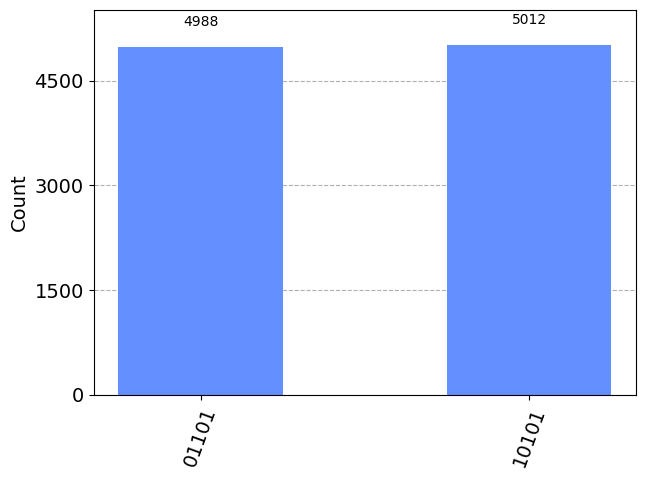

In [ ]:
from qiskit.visualization import plot_histogram
simulator=Aer.get_backend('qasm_simulator')
count=execute(circuit,backend=simulator,shots=10000).result().get_counts()
print(count)
plot_histogram(count)

In [ ]:
circuit.clear()
circuit.draw()

a_0: 
     
a_1: 
     
a_2: 
     
a_3: 
     
b_0: 
     
b_1: 
     
b_2: 
     
b_3: 
     
c_0: 
     
c_1: 
     
c_2: 
     
c_3: 
     
c_4: 
     
s: 5/

Now, complicating it further let |a>=0001 and |b>=0011 and entangling every corresponding qubit of the two registers, i.e a[0] entangled with b[0] and so on

In [ ]:
circuit.x(a[0])
circuit.x(b[0])
circuit.x(b[1])
circuit.draw()

┌───┐
a_0: ┤ X ├
     └───┘
a_1: ─────
          
a_2: ─────
          
a_3: ─────
     ┌───┐
b_0: ┤ X ├
     ├───┤
b_1: ┤ X ├
     └───┘
b_2: ─────
          
b_3: ─────
          
c_0: ─────
          
c_1: ─────
          
c_2: ─────
          
c_3: ─────
          
c_4: ─────
          
s: 5/═════

In [ ]:
for i in range(4):
  circuit.h(a[i])
  circuit.cx(a[i],b[i])
circuit.draw()

┌───┐┌───┐               
a_0: ┤ X ├┤ H ├────────────■──
     ├───┤└───┘            │  
a_1: ┤ H ├──■──────────────┼──
     ├───┤  │              │  
a_2: ┤ H ├──┼────■─────────┼──
     ├───┤  │    │         │  
a_3: ┤ H ├──┼────┼────■────┼──
     ├───┤  │    │    │  ┌─┴─┐
b_0: ┤ X ├──┼────┼────┼──┤ X ├
     ├───┤┌─┴─┐  │    │  └───┘
b_1: ┤ X ├┤ X ├──┼────┼───────
     └───┘└───┘┌─┴─┐  │       
b_2: ──────────┤ X ├──┼───────
               └───┘┌─┴─┐     
b_3: ───────────────┤ X ├─────
                    └───┘     
c_0: ─────────────────────────
                              
c_1: ─────────────────────────
                              
c_2: ─────────────────────────
                              
c_3: ─────────────────────────
                              
c_4: ─────────────────────────
                              
s: 5/═════════════════════════

In [ ]:
#implementing full adder for each single qubit of the quantum register
for i in range(4):
  full_Adder(c[i],a[i],b[i],c[i+1],circuit)
circuit.measure(b[0],s[0])
circuit.measure(b[1],s[1])
circuit.measure(b[2],s[2])
circuit.measure(b[3],s[3])
circuit.measure(c[4],s[4])
circuit.draw()


┌───┐┌───┐                                    ░                      ░ »
a_0: ┤ X ├┤ H ├────────────■────■────■─────────────░──────────────────────░─»
     ├───┤└───┘            │    │    │             ░                      ░ »
a_1: ┤ H ├──■──────────────┼────┼────┼─────────────░───■────■─────────────░─»
     ├───┤  │              │    │    │             ░   │    │             ░ »
a_2: ┤ H ├──┼────■─────────┼────┼────┼─────────────░───┼────┼─────────────░─»
     ├───┤  │    │         │    │    │             ░   │    │             ░ »
a_3: ┤ H ├──┼────┼────■────┼────┼────┼─────────────░───┼────┼─────────────░─»
     ├───┤  │    │    │  ┌─┴─┐  │  ┌─┴─┐     ┌───┐ ░   │    │             ░ »
b_0: ┤ X ├──┼────┼────┼──┤ X ├──■──┤ X ├──■──┤ X ├─░───┼────┼─────────────░─»
     ├───┤┌─┴─┐  │    │  └───┘  │  └───┘  │  └─┬─┘ ░   │  ┌─┴─┐     ┌───┐ ░ »
b_1: ┤ X ├┤ X ├──┼────┼─────────┼─────────┼────┼───░───■──┤ X ├──■──┤ X ├─░─»
     └───┘└───┘┌─┴─┐  │         │         │    │   ░   │  └───┘  │  └─┬─┘ ░ »
b_2: ──────────┤ X ├──┼─────────┼─────────┼────┼───░───┼─────────┼────┼───░─»
               └───┘┌─┴─┐       │         │    │   ░   │         │    │   ░ »
b_3: ───────────────┤ X ├───────┼─────────┼────┼───░───┼─────────┼────┼───░─»
                    └───┘       │         │    │   ░   │         │    │   ░ »
c_0: ───────────────────────────┼─────────■────■───░───┼─────────┼────┼───░─»
                              ┌─┴─┐     ┌─┴─┐      ░   │         │    │   ░ »
c_1: ─────────────────────────┤ X ├─────┤ X ├──────░───┼─────────■────■───░─»
                              └───┘     └───┘      ░ ┌─┴─┐     ┌─┴─┐      ░ »
c_2: ──────────────────────────────────────────────░─┤ X ├─────┤ X ├──────░─»
                                                   ░ └───┘     └───┘      ░ »
c_3: ──────────────────────────────────────────────░──────────────────────░─»
                                                   ░                      ░ »
c_4: ──────────────────────────────────────────────░──────────────────────░─»
                                                   ░                      ░ »
s: 5/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                          ░                      ░                
«a_0: ─────────────────────░──────────────────────░────────────────
«                          ░                      ░                
«a_1: ─────────────────────░──────────────────────░────────────────
«                          ░                      ░                
«a_2: ──■────■─────────────░──────────────────────░────────────────
«       │    │             ░                      ░                
«a_3: ──┼────┼─────────────░───■────■─────────────░────────────────
«       │    │             ░   │    │             ░ ┌─┐            
«b_0: ──┼────┼─────────────░───┼────┼─────────────░─┤M├────────────
«       │    │             ░   │    │             ░ └╥┘┌─┐         
«b_1: ──┼────┼─────────────░───┼────┼─────────────░──╫─┤M├─────────
«       │  ┌─┴─┐     ┌───┐ ░   │    │             ░  ║ └╥┘┌─┐      
«b_2: ──■──┤ X ├──■──┤ X ├─░───┼────┼─────────────░──╫──╫─┤M├──────
«       │  └───┘  │  └─┬─┘ ░   │  ┌─┴─┐     ┌───┐ ░  ║  ║ └╥┘┌─┐   
«b_3: ──┼─────────┼────┼───░───■──┤ X ├──■──┤ X ├─░──╫──╫──╫─┤M├───
«       │         │    │   ░   │  └───┘  │  └─┬─┘ ░  ║  ║  ║ └╥┘   
«c_0: ──┼─────────┼────┼───░───┼─────────┼────┼───░──╫──╫──╫──╫────
«       │         │    │   ░   │         │    │   ░  ║  ║  ║  ║    
«c_1: ──┼─────────┼────┼───░───┼─────────┼────┼───░──╫──╫──╫──╫────
«       │         │    │   ░   │         │    │   ░  ║  ║  ║  ║    
«c_2: ──┼─────────■────■───░───┼─────────┼────┼───░──╫──╫──╫──╫────
«     ┌─┴─┐     ┌─┴─┐      ░   │         │    │   ░  ║  ║  ║  ║    
«c_3: ┤ X ├─────┤ X ├──────░───┼─────────■────■───░──╫──╫──╫──╫────
«     └───┘     └───┘      ░ ┌─┴─┐     ┌─┴─┐      ░  ║  ║  ║  ║ ┌─┐
«c_4: ─────────────────────░─┤ X ├─────┤ X 

{'11011': 2530, '01011': 2499, '00011': 2436, '10011': 2535}


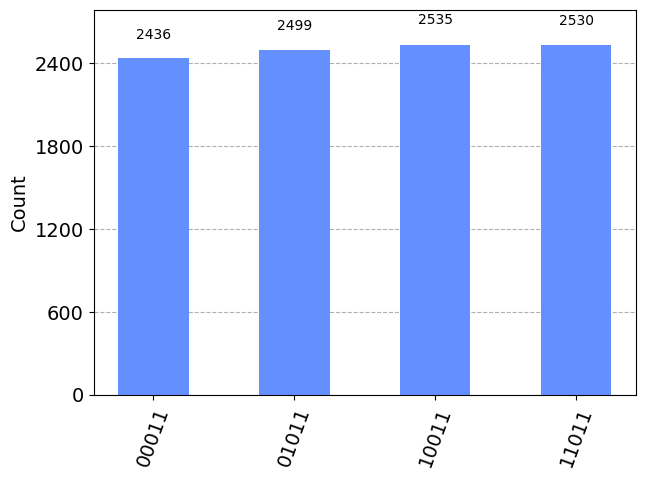

In [ ]:
simulator=Aer.get_backend('qasm_simulator')
count=execute(circuit,backend=simulator,shots=10000).result().get_counts()
print(count)
from qiskit.visualization import plot_histogram
plot_histogram(count)

In [ ]:
circuit.clear()
circuit.draw()

a_0: 
     
a_1: 
     
a_2: 
     
a_3: 
     
b_0: 
     
b_1: 
     
b_2: 
     
b_3: 
     
c_0: 
     
c_1: 
     
c_2: 
     
c_3: 
     
c_4: 
     
s: 5/

CARRY-LOOK AHEAD ADDER

In [ ]:
g=QuantumRegister(4,'g')#adding a register to circuit to store values of carry generator i.e a.b
p=QuantumRegister(4,'p')#adding a register to circuit to store values of carry propagator i.e a xor b
bfr=QuantumRegister(3,'bfr')# adding three buffer qubits to store some additonal values
circuit.add_register(g)
circuit.add_register(p)
circuit.add_register(bfr)

In [ ]:

def carry_Lookahead_Adder(circuit):
  for i in range(4):
    circuit.ccx(a[i],b[i],g[i])# storing the value of carry generator
    circuit.cx(a[i],b[i])#b=a xor b
    circuit.cx(b[i],p[i])# storiung the value of carry propagator
    circuit.cx(g[i],c[i])#c=c xor g since c=0 so c=g=a.b

  # for rightmost value of final answer value is already stored in b[0] and carry generated from rightmost qubit is stored in c[0]
  circuit.ccx(p[1],g[0],c[1])#c[1]=c[1] xor p[1].g[0] hence c[1]=a[1].b[1] xor p[1].g[0] which is the second carry
  circuit.cx(c[0],b[1])#b[1]=a[1] xor b[1] xor c[1] which gives us the second qubit from right of the final answer

  circuit.ccx(p[1],p[0],bfr[0])#bfr[0]=p[1].p[0]
  circuit.ccx(p[2],g[1],c[2])#c[2]=c[2] xor p[2].g[1] hence c[2]=a[2].b[2] xor p[2].g[1]
  circuit.ccx(bfr[0],g[0],c[2])#c[2]=c[2] xor bfr[0].g[0] hence c[2]=a[2].b[2] xor p[2].g[1] xor p[1].p[0].g[0] which is the second carry
  circuit.cx(c[1],b[2])#b[2]=a[2] xor b[2] xor c[1] which gives us the third qubit from right of the final answer

  circuit.ccx(p[3],p[2],bfr[1])#bfr[1]=bfr[1] xor p[3].p[2] since initially bfr[1]=0 so bfr[1]=p[3].p[2]
  circuit.ccx(bfr[1],p[1],bfr[2])#bfr[2]=bfr[2] xor bfr[1].p[1] which implies bfr[2]=p[3].p[2].p[1]
  circuit.ccx(p[3],g[2],c[3])#c[3]=c[3] xor p[3].g[2] which implies c[3]=a[3].b[3] xor p[3].g[2]
  circuit.ccx(bfr[1],g[1],c[3])#c[3]=a[3].b[3] xor p[3].g[2] xor bfr[1].g[1] which implies c[3]=a[3].b[3] xor p[3].g[2] xor p[3].p[2].g[1]
  circuit.ccx(bfr[2],g[0],c[3])#c[3]=a[3].b[3] xor p[3].g[2] xor p[3].p[2].g[1] xor bfr[2].g[0] which implies c[3]=a[3].b[3] xor p[3].g[2] xor p[3].p[2].g[1] xor bfr[2]=p[3].p[2].p[1].g[0]
  circuit.cx(c[2],b[3])#b[3]=a[3] xor b[3] xor c[2] which gives us the fourth qubit from right of the final answer

  #Measuring the qubits
  circuit.measure(b[0],s[0])
  circuit.measure(b[1],s[1])
  circuit.measure(b[2],s[2])
  circuit.measure(b[3],s[3])
  circuit.measure(c[4],s[4])








CASE 1-> a=|0010> b=|1011>

In [ ]:
circuit.x(a[1])
circuit.x(b[0])
circuit.x(b[1])
circuit.x(b[3])
circuit.draw()

a_0: ─────
       ┌───┐
  a_1: ┤ X ├
       └───┘
  a_2: ─────
            
  a_3: ─────
       ┌───┐
  b_0: ┤ X ├
       ├───┤
  b_1: ┤ X ├
       └───┘
  b_2: ─────
       ┌───┐
  b_3: ┤ X ├
       └───┘
  c_0: ─────
            
  c_1: ─────
            
  c_2: ─────
            
  c_3: ─────
            
  c_4: ─────
            
  g_0: ─────
            
  g_1: ─────
            
  g_2: ─────
            
  g_3: ─────
            
  p_0: ─────
            
  p_1: ─────
            
  p_2: ─────
            
  p_3: ─────
            
bfr_0: ─────
            
bfr_1: ─────
            
bfr_2: ─────
            
  s: 5/═════

In [ ]:
#implementing carry look ahead for each single qubit of the quantum register
carry_Lookahead_Adder(circuit)

{'01101': 10000}


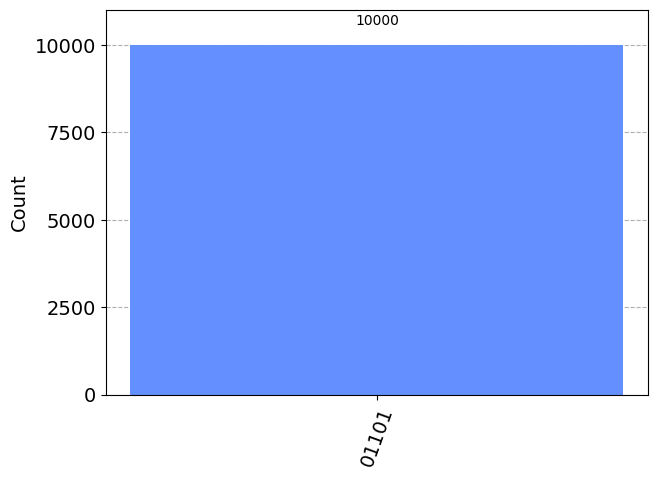

In [ ]:
simulator=Aer.get_backend('qasm_simulator')
count=execute(circuit,backend=simulator,shots=10000).result().get_counts()
print(count)
from qiskit.visualization import plot_histogram
plot_histogram(count)

In [ ]:
print("Circuit depth=")
circuit.depth()

Circuit depth=


9

In [ ]:
circuit.clear()

CASE 2-> a=|0001> b=|0011>

In [ ]:
circuit.x(a[0])
circuit.x(b[0])
circuit.x(b[1])
circuit.draw()

┌───┐
  a_0: ┤ X ├
       └───┘
  a_1: ─────
            
  a_2: ─────
            
  a_3: ─────
       ┌───┐
  b_0: ┤ X ├
       ├───┤
  b_1: ┤ X ├
       └───┘
  b_2: ─────
            
  b_3: ─────
            
  c_0: ─────
            
  c_1: ─────
            
  c_2: ─────
            
  c_3: ─────
            
  c_4: ─────
            
  g_0: ─────
            
  g_1: ─────
            
  g_2: ─────
            
  g_3: ─────
            
  p_0: ─────
            
  p_1: ─────
            
  p_2: ─────
            
  p_3: ─────
            
bfr_0: ─────
            
bfr_1: ─────
            
bfr_2: ─────
            
  s: 5/═════

In [ ]:
#implementing carry look ahead adder for each single qubit of the quantum register
carry_Lookahead_Adder(circuit)

{'00100': 10000}


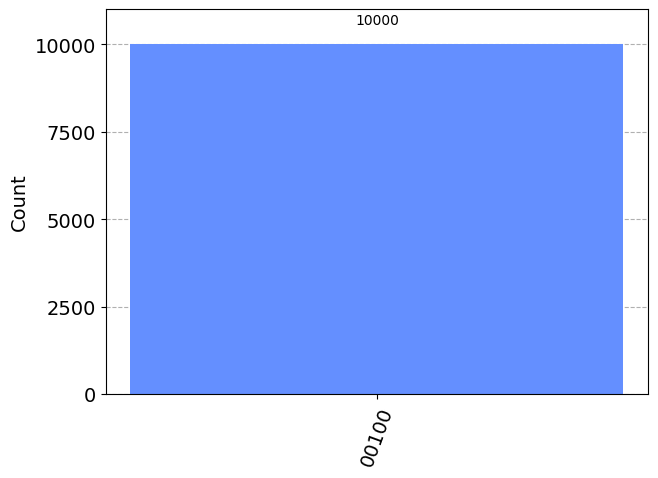

In [ ]:
simulator=Aer.get_backend('qasm_simulator')
count=execute(circuit,backend=simulator,shots=10000).result().get_counts()
print(count)
from qiskit.visualization import plot_histogram
plot_histogram(count)

In [ ]:
print("Circuit depth=")
circuit.depth()

Circuit depth=


9

In [ ]:
circuit.clear()

CASE 3-> a=(|0010>+|0100>)/sqrt(2) b=(|1011>+|0001>)/sqrt(2)

In [ ]:
import numpy as np
from numpy import sqrt
desired_state_a = np.array([0, 0, 1, 0, 1, 0, 0, 0,0,0,0,0,0,0,0,0]) /sqrt(2)
circuit.initialize(desired_state_a, a)
desired_state_b = np.array([0, 1, 0, 0, 0, 0, 0, 0,0,0,0,1,0,0,0,0]) /sqrt(2)
circuit.initialize(desired_state_b, b)
circuit.draw()


┌──────────────────────────────────────────────────────────┐
  a_0: ┤0                                                         ├
       │                                                          │
  a_1: ┤1                                                         ├
       │  Initialize(0,0,0.70711,0,0.70711,0,0,0,0,0,0,0,0,0,0,0) │
  a_2: ┤2                                                         ├
       │                                                          │
  a_3: ┤3                                                         ├
       ├──────────────────────────────────────────────────────────┤
  b_0: ┤0                                                         ├
       │                                                          │
  b_1: ┤1                                                         ├
       │  Initialize(0,0.70711,0,0,0,0,0,0,0,0,0,0.70711,0,0,0,0) │
  b_2: ┤2                                                         ├
       │                                                          │
  b_3: ┤3                                                         ├
       └──────────────────────────────────────────────────────────┘
  c_0: ────────────────────────────────────────────────────────────
                                                                   
  c_1: ────────────────────────────────────────────────────────────
                                                                   
  c_2: ────────────────────────────────────────────────────────────
                                                                   
  c_3: ────────────────────────────────────────────────────────────
                                                                   
  c_4: ────────────────────────────────────────────────────────────
                                                                   
  g_0: ────────────────────────────────────────────────────────────
                                                                   
  g_1: ────────────────────────────────────────────────────────────
                                                                   
  g_2: ────────────────────────────────────────────────────────────
                                                                   
  g_3: ────────────────────────────────────────────────────────────
                                                                   
  p_0: ────────────────────────────────────────────────────────────
                                                                   
  p_1: ────────────────────────────────────────────────────────────
                                                                   
  p_2: ────────────────────────────────────────────────────────────
                                                                   
  p_3: ────────────────────────────────────────────────────────────
                                                                   
bfr_0: ────────────────────────────────────────────────────────────
                                                                   
bfr_1: ────────────────────────────────────────────────────────────
                                                                   
bfr_2: ────────────────────────────────────────────────────────────
                                                                   
  s: 5/════════════════════════════════════════════════════════════

In [ ]:
#implementing carry look ahead adder for each single qubit of the quantum register
carry_Lookahead_Adder(circuit)



{'00011': 257, '00101': 250, '01101': 244, '01111': 249}


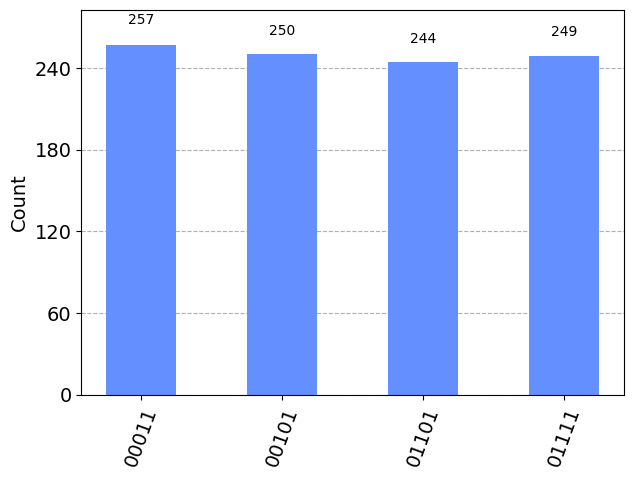

In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram
simulator=Aer.get_backend('qasm_simulator')
count=execute(circuit,backend=simulator,shots=1000).result().get_counts()
print(count)
plot_histogram(count)

In [ ]:
print("Circuit depth=")
circuit.depth()

Circuit depth=


9

In [ ]:
circuit.clear()

Case 4-> a=(|0000>+|0111>)/sqrt(2) b=(|0111>+|1000>)/sqrt(2)

In [ ]:
desired_state_a = np.array([1, 0, 0, 0, 0, 0, 0, 1,0,0,0,0,0,0,0,0]) /sqrt(2)
circuit.initialize(desired_state_a, a)
desired_state_b = np.array([0, 0, 0, 0, 0, 0, 0, 1,1,0,0,0,0,0,0,0]) /sqrt(2)
circuit.initialize(desired_state_b, b)
circuit.draw()

┌──────────────────────────────────────────────────────────┐
  a_0: ┤0                                                         ├
       │                                                          │
  a_1: ┤1                                                         ├
       │  Initialize(0.70711,0,0,0,0,0,0,0.70711,0,0,0,0,0,0,0,0) │
  a_2: ┤2                                                         ├
       │                                                          │
  a_3: ┤3                                                         ├
       ├──────────────────────────────────────────────────────────┤
  b_0: ┤0                                                         ├
       │                                                          │
  b_1: ┤1                                                         ├
       │  Initialize(0,0,0,0,0,0,0,0.70711,0.70711,0,0,0,0,0,0,0) │
  b_2: ┤2                                                         ├
       │                                                          │
  b_3: ┤3                                                         ├
       └──────────────────────────────────────────────────────────┘
  c_0: ────────────────────────────────────────────────────────────
                                                                   
  c_1: ────────────────────────────────────────────────────────────
                                                                   
  c_2: ────────────────────────────────────────────────────────────
                                                                   
  c_3: ────────────────────────────────────────────────────────────
                                                                   
  c_4: ────────────────────────────────────────────────────────────
                                                                   
  g_0: ────────────────────────────────────────────────────────────
                                                                   
  g_1: ────────────────────────────────────────────────────────────
                                                                   
  g_2: ────────────────────────────────────────────────────────────
                                                                   
  g_3: ────────────────────────────────────────────────────────────
                                                                   
  p_0: ────────────────────────────────────────────────────────────
                                                                   
  p_1: ────────────────────────────────────────────────────────────
                                                                   
  p_2: ────────────────────────────────────────────────────────────
                                                                   
  p_3: ────────────────────────────────────────────────────────────
                                                                   
bfr_0: ────────────────────────────────────────────────────────────
                                                                   
bfr_1: ────────────────────────────────────────────────────────────
                                                                   
bfr_2: ────────────────────────────────────────────────────────────
                                                                   
  s: 5/════════════════════════════════════════════════════════════

In [ ]:
#implementing carry look ahead adder for each single qubit of the quantum register
carry_Lookahead_Adder(circuit)

{'00111': 239, '01000': 245, '01111': 259, '01110': 257}


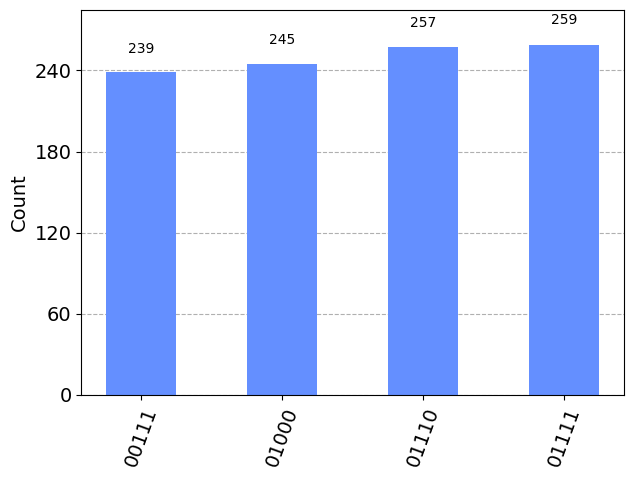

In [ ]:
simulator=Aer.get_backend('qasm_simulator')
count=execute(circuit,backend=simulator,shots=1000).result().get_counts()
print(count)
plot_histogram(count)

In [ ]:
print("Circuit depth=")
circuit.depth()

Circuit depth=


9

It can be seen clearly that in case of full adder the circuit depth is 18 whereas in case of carry look ahead adder circuit depth is 9